In [375]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [376]:
df = pd.read_csv('/content/placement_with_experience.csv')

In [377]:
df.head()

,Unnamed: 0,cgpa,iq,placement,Experience
0,0,6.8,123.0,1,5.0
1,1,5.9,106.0,0,3.0
2,2,5.3,121.0,0,1.0
3,3,7.4,132.0,1,2.0
4,4,5.8,142.0,0,0.0


In [378]:
# Remove Unnecessary columns in Data
df = df.iloc[:,1:]

In [379]:
df.head()

,cgpa,iq,placement,Experience
0,6.8,123.0,1,5.0
1,5.9,106.0,0,3.0
2,5.3,121.0,0,1.0
3,7.4,132.0,1,2.0
4,5.8,142.0,0,0.0


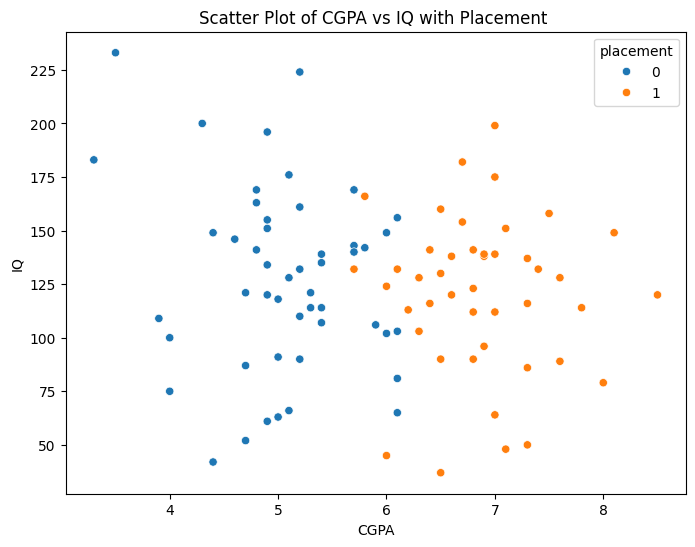

In [380]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=df)
plt.title('Scatter Plot of CGPA vs IQ with Placement ')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [381]:
df.isnull().mean()

,0
cgpa,0.06
iq,0.06
placement,0.00
Experience,0.08


# ***Try Best Results***
## *`Try mean or median & also compare with orginal`*

In [382]:
# Replace Missing values is Mean & Median with Name of Columns

mean_cgpa = df['cgpa'].mean()
median_cgpa = df['cgpa'].median()

mean_iq = df['iq'].mean()
median_iq = df['iq'].median()

mean_experience = df['Experience'].mean()
median_experience = df['Experience'].median()

In [383]:
df['CGPA_mean'] = df['cgpa'].fillna(mean_cgpa)
df['CGPA_median'] = df['cgpa'].fillna(median_cgpa)

df['IQ_mean'] = df['iq'].fillna(mean_iq)
df['IQ_median'] = df['iq'].fillna(median_iq)

df['Experience_mean'] = df['Experience'].fillna(mean_experience)
df['Experience_median'] = df['Experience'].fillna(median_experience)

In [384]:
df.sample(10)

,cgpa,iq,placement,Experience,CGPA_mean,CGPA_median,IQ_mean,IQ_median,Experience_mean,Experience_median
49,5.4,135.0,0,7.0,5.4,5.4,135.0,135.0,7.0,7.0
90,7.3,86.0,1,1.0,7.3,7.3,86.0,86.0,1.0,1.0
72,7.3,116.0,1,10.0,7.3,7.3,116.0,116.0,10.0,10.0
25,5.0,91.0,0,4.0,5.0,5.0,91.0,91.0,4.0,4.0
64,7.0,64.0,1,8.0,7.0,7.0,64.0,64.0,8.0,8.0
30,7.6,128.0,1,0.0,7.6,7.6,128.0,128.0,0.0,0.0
85,5.8,166.0,1,0.0,5.8,5.8,166.0,166.0,0.0,0.0
11,6.9,138.0,1,0.0,6.9,6.9,138.0,138.0,0.0,0.0
0,6.8,123.0,1,5.0,6.8,6.8,123.0,123.0,5.0,5.0
42,7.6,89.0,1,7.0,7.6,7.6,89.0,89.0,7.0,7.0


In [385]:
# Check Mean & median Variance Compare to Original variance
print("Original : " , df['cgpa'].var() )
print("After Mean : " , df['CGPA_mean'].var() )
print("After Median : " , df['CGPA_median'].var() )

print("Original : " , df['iq'].var() )
print("After Mean : " , df['IQ_mean'].var() )
print("After Median : " , df['IQ_median'].var() )

print("Original : " , df['Experience'].var() )
print("After Mean : " , df['Experience_mean'].var() )
print("After Median : " , df['Experience_median'].var() )

Original :  1.2674319377716763
After Mean :  1.1906178809370296
After Median :  1.1907989898989897
Original :  1579.5191031800507
After Mean :  1483.79067268429
After Median :  1484.0589898989901
Original :  11.345437171524132
After Mean :  10.428634167764606
After Median :  10.429898989898991


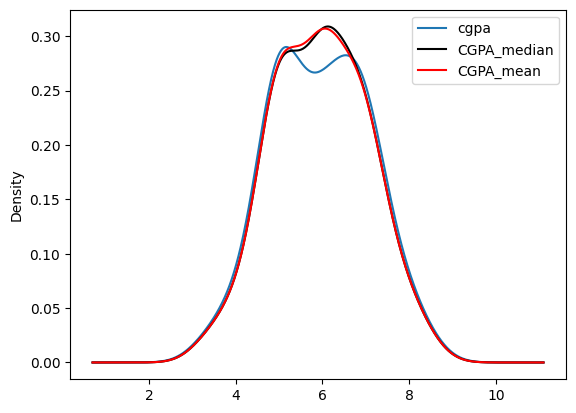

In [386]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable distributions
df['cgpa'].plot(kind='kde' , ax=ax)

# Variable imputed with median
df['CGPA_median'].plot(kind='kde' , ax=ax , color='black')

# Variable imputed with mean
df['CGPA_mean'].plot(kind='kde' , ax=ax , color='red')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

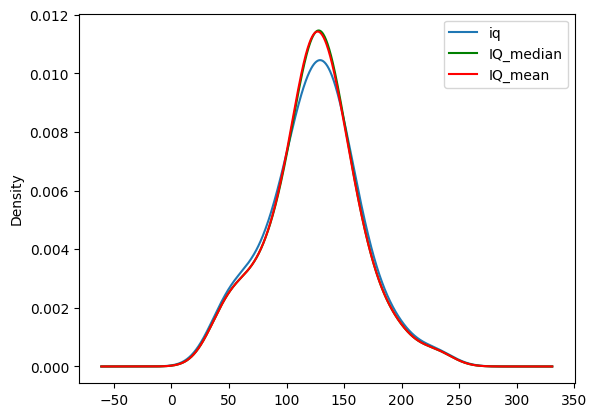

In [387]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable distributions
df['iq'].plot(kind='kde' , ax=ax)

# Variable imputed with median
df['IQ_median'].plot(kind='kde' , ax=ax , color='green')

# Variable imputed with mean
df['IQ_mean'].plot(kind='kde' , ax=ax , color='red')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

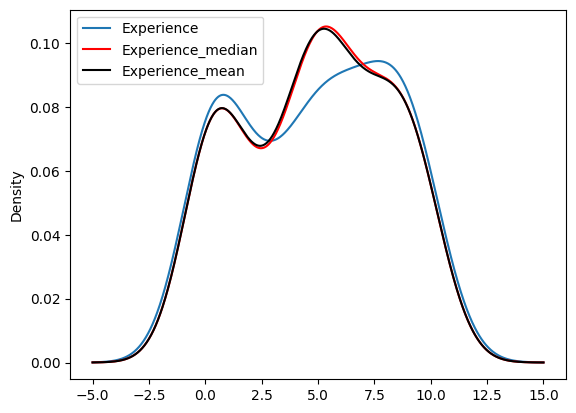

In [388]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable distributions
df['Experience'].plot(kind='kde' , ax=ax)

# Variable imputed with median
df['Experience_median'].plot(kind='kde' , ax=ax , color='red')

# Variable imputed with mean
df['Experience_mean'].plot(kind='kde' , ax=ax , color='black')

# add Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<Axes: >

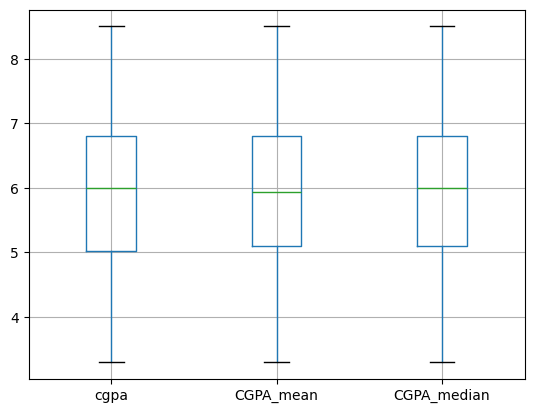

In [389]:
# Check outliers
df[['cgpa' , 'CGPA_mean' , 'CGPA_median']].boxplot()

<Axes: >

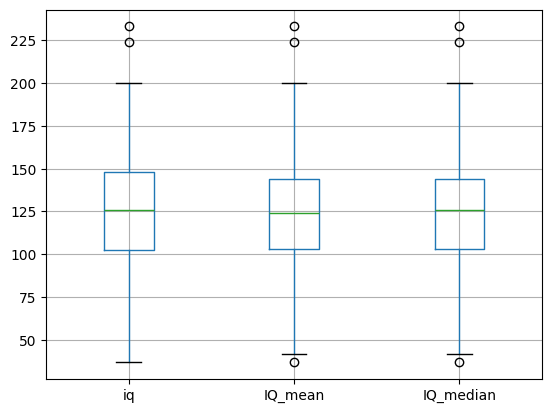

In [390]:
df[['iq' , 'IQ_mean' , 'IQ_median']].boxplot()

<Axes: >

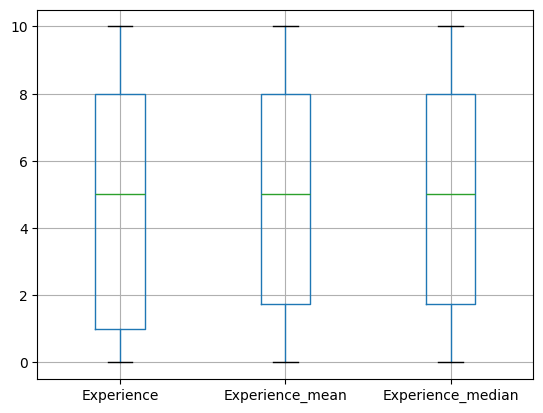

In [391]:
df[['Experience' , 'Experience_mean' , 'Experience_median']].boxplot()

# Continue Code

In [392]:
df.isnull().sum()

,0
cgpa,6
iq,6
placement,0
Experience,8
CGPA_mean,0
CGPA_median,0
IQ_mean,0
IQ_median,0
Experience_mean,0
Experience_median,0


In [393]:
df['cgpa'] = df["cgpa"].fillna(df['cgpa'].mean())
df['iq'] = df["iq"].fillna(df['iq'].mean())
df['Experience'] = df["Experience"].fillna(df['Experience'].mean())

In [394]:
df.isnull().sum()

,0
cgpa,0
iq,0
placement,0
Experience,0
CGPA_mean,0
CGPA_median,0
IQ_mean,0
IQ_median,0
Experience_mean,0
Experience_median,0


In [395]:
# add 2 Columns in our data
df["cgpa_iq_ratio"] = df["cgpa"] / df["iq"]
df["internship"] = np.random.choice([0,1], df.shape[0])

In [396]:
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cgpa               100 non-null    float64
 1   iq                 100 non-null    float64
 2   placement          100 non-null    int64  
 3   Experience         100 non-null    float64
 4   CGPA_mean          100 non-null    float64
 5   CGPA_median        100 non-null    float64
 6   IQ_mean            100 non-null    float64
 7   IQ_median          100 non-null    float64
 8   Experience_mean    100 non-null    float64
 9   Experience_median  100 non-null    float64
 10  cgpa_iq_ratio      100 non-null    float64
 11  internship         100 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 9.5 KB


(   cgpa     iq  placement  Experience  CGPA_mean  CGPA_median  IQ_mean  \
 0   6.8  123.0          1         5.0        6.8          6.8    123.0   
 1   5.9  106.0          0         3.0        5.9          5.9    106.0   
 2   5.3  121.0          0         1.0        5.3          5.3    121.0   
 3   7.4  132.0          1         2.0        7.4          7.4    132.0   
 4   5.8  142.0          0         0.0        5.8          5.8    142.0   
 
    IQ_median  Experience_mean  Experience_median  cgpa_iq_ratio  internship  
 0      123.0              5.0                5.0       0.055285           1  
 1      106.0              3.0                3.0       0.055660           0  
 2      121.0              1.0                1.0       0.043802           0  
 3      132.0              2.0                2.0       0.056061           0  
 4      142.0              0.0                0.0       0.040845           1  ,
 None)

In [397]:
# Seperate Input & Output columns
x = df.iloc[:,[0,1,3,-1]]
y = df.iloc[:,2]

In [398]:
x

,cgpa,iq,Experience,internship
0,6.8,123.0,5.000000,1
1,5.9,106.0,3.000000,0
2,5.3,121.0,1.000000,0
3,7.4,132.0,2.000000,0
4,5.8,142.0,0.000000,1
...,...,...,...,...
95,4.3,200.0,9.000000,1
96,4.4,42.0,0.000000,1
97,6.7,182.0,3.000000,1
98,6.3,103.0,6.000000,0


In [399]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [400]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25)

In [401]:
x_train

,cgpa,iq,Experience,internship
64,7.0,64.0,8.0,1
74,6.7,154.0,6.0,1
25,5.0,91.0,4.0,0
32,7.0,139.0,0.0,0
20,6.6,120.0,9.0,1
...,...,...,...,...
57,6.5,130.0,7.0,0
55,7.8,114.0,2.0,0
54,6.4,141.0,7.0,0
28,5.2,90.0,5.0,0


In [402]:
y_train

,placement
64,1
74,1
25,0
32,1
20,1
...,...
57,1
55,1
54,1
28,0


In [403]:
x_test

,cgpa,iq,Experience,internship
21,7.1,151.0,10.000000,1
38,6.5,160.0,9.000000,1
86,5.1,128.0,9.000000,0
49,5.4,135.0,7.000000,0
12,5.4,139.0,8.000000,1
75,4.8,169.0,3.000000,1
73,4.9,61.0,4.000000,0
79,6.5,90.0,5.000000,1
72,7.3,116.0,10.000000,0
43,6.8,141.0,9.000000,1


In [404]:
y_test

,placement
21,1
38,1
86,0
49,0
12,0
75,0
73,0
79,1
72,1
43,1


In [405]:
from sklearn.preprocessing import StandardScaler

In [406]:
scaler = StandardScaler()

In [407]:
x_train = scaler.fit_transform(x_train)

In [408]:
x_train

array([[ 0.94380248, -1.46830134,  0.98700754,  1.040833  ],
       [ 0.67133623,  0.87308393,  0.37969953,  1.040833  ],
       [-0.87263919, -0.76588576, -0.22760848, -0.96076892],
       [ 0.94380248,  0.48285305, -1.44222449, -0.96076892],
       [ 0.58051415, -0.01143939,  1.29066154,  1.040833  ],
       [ 0.03558164, -0.47971645,  1.29066154,  1.040833  ],
       [ 0.8529804 ,  0.45683766, -1.44222449,  1.040833  ],
       [ 1.85202332, -1.07807046, -1.13857049,  1.040833  ],
       [ 0.12640373,  0.30074531,  0.03643848,  1.040833  ],
       [ 1.21626873, -0.89596272, -1.13857049,  1.040833  ],
       [ 2.30613374, -0.01143939,  0.07604552,  1.040833  ],
       [ 0.76215831, -0.79190115, -1.13857049, -0.96076892],
       [-0.14606252,  0.56089923, -1.44222449,  1.040833  ],
       [ 0.58051415,  0.45683766,  1.29066154,  1.040833  ],
       [-1.78086003, -0.53174723,  0.07604552, -0.96076892],
       [-0.87263919, -1.49431673, -0.53126248, -0.96076892],
       [-0.69099502,  0.

In [409]:
x_test = scaler.transform(x_test)

In [410]:
x_test

array([[ 1.03462457,  0.79503776,  1.59431554,  1.040833  ],
       [ 0.48969206,  1.02917628,  1.29066154,  1.040833  ],
       [-0.78181711,  0.19668374,  1.29066154, -0.96076892],
       [-0.50935086,  0.37879149,  0.68335353, -0.96076892],
       [-0.50935086,  0.48285305,  0.98700754,  1.040833  ],
       [-1.05428336,  1.26331481, -0.53126248,  1.040833  ],
       [-0.96346128, -1.54634751, -0.22760848, -0.96076892],
       [ 0.48969206, -0.79190115,  0.07604552,  1.040833  ],
       [ 1.21626873, -0.11550096,  1.59431554, -0.96076892],
       [ 0.76215831,  0.53488384,  1.29066154,  1.040833  ],
       [-0.96346128,  1.96573039, -0.53126248, -0.96076892],
       [-0.50935086, -0.34963949,  0.03643848, -0.96076892],
       [-0.60017294,  0.014576  , -1.13857049, -0.96076892],
       [ 0.94380248, -0.21956253, -1.13857049, -0.96076892],
       [ 0.3080479 , -0.45370105,  0.37969953, -0.96076892],
       [ 0.12640373, -1.02603967,  0.98700754, -0.96076892],
       [ 0.94380248,  2.

In [411]:
from sklearn.linear_model import LogisticRegression

In [412]:
clf = LogisticRegression()

In [413]:
clf.fit(x_train,y_train)

LogisticRegression()

In [414]:
print (clf.predict(x_test))
y_pred = clf.predict(x_test)

[1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0]


In [415]:
y_test

,placement
21,1
38,1
86,0
49,0
12,0
75,0
73,0
79,1
72,1
43,1


In [416]:
from sklearn.metrics import accuracy_score

In [417]:
accuracy_score(y_test,y_pred)

0.92

In [418]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

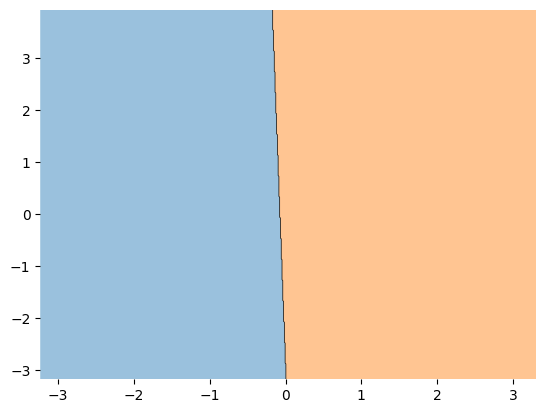

In [419]:
plot_decision_regions(x_train, y_train.values, clf=clf, filler_feature_values={2: 0, 3: 0})

In [420]:
import pickle

In [421]:
pickle.dump(clf,open('model.pkl' , 'wb') )